# 图像金字塔及直方图  

## 1 图像金字塔 
图像金字塔是一系列图像的集合，就如下图所示，更高层图像尺寸更小，更底层图像尺寸更大，看起来就像一个金字塔一样 

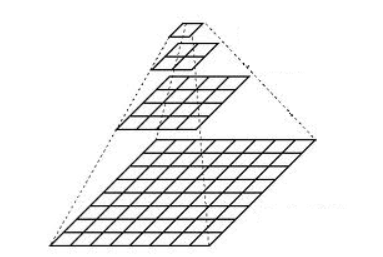


### 1.1 pyrDown 

这里的down是指图像变小，所以原始图像在金字塔的底部。

首先将当前层的图像和下面这个高斯核卷积 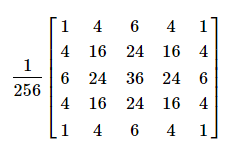

这个高斯核的尺寸为5×5大小，所有元素的值加起来正好为256，最后再除以256，得到的加权和正好为1。其距离最中心越近数值越大，这正好和高斯平滑选择的高斯核类似。这个过程也类似于高斯平滑，从后面的例子也可以看到经过pyrDown()处理的图像变得更加模糊(平滑)。然后移除偶数行和偶数列，然后就能得到和原图相比是原图1/4大小的新的图像，在图像金字塔中就位于当前层的上一层。


In [2]:
import warnings
warnings.filterwarnings("ignore") 
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (9,9) 
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)  

#解决中文显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

img.shape (512, 512, 3)
img_down.shape (256, 256, 3)
img_down2.shape (128, 128, 3)
img_down3.shape (64, 64, 3)


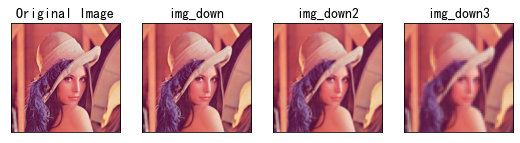

In [3]:
import cv2

img = cv2.imread('./images/lena.jpg')
img_down = cv2.pyrDown(img,dstsize=(img.shape[1]//2,img.shape[0]//2))
img_down2 = cv2.pyrDown(img_down,dstsize=(img_down.shape[1]//2,img_down.shape[0]//2))
img_down3 = cv2.pyrDown(img_down2,dstsize=(img_down2.shape[1]//2,img_down2.shape[0]//2))
print('img.shape',img.shape)
print('img_down.shape',img_down.shape)
print('img_down2.shape',img_down2.shape)
print('img_down3.shape',img_down3.shape)

titles = ['Original Image', "img_down",'img_down2','img_down3']
images = [img, img_down, img_down2,img_down3]

for i in range(4):
    plt.subplot(1, 4, i + 1), plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
    
plt.show()


### 1.2 pyrUp 

这里的up是指将图像的尺寸变大，所以原始图像位于图像金字塔的顶层。

首先将当前层图像的宽高扩大2倍，插入的行和列位于偶数行或偶数列，这些位置填充数值0；然后用和pyrDown一样的kernel和当前层的图像卷积，填充到刚才插入的行列中。

img.shape (512, 512, 3)
img_up.shape (1024, 1024, 3)
img_up2.shape (2048, 2048, 3)
img_up3.shape (4096, 4096, 3)


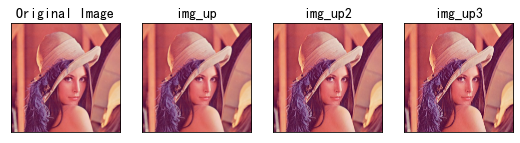

In [50]:
import cv2

img = cv2.imread('./images/lena.jpg')
#img = cv2.resize(img,None,fx=0.15,fy=0.15)#为了观察方便缩小原图
img_up = cv2.pyrUp(img,dstsize=(2*img.shape[1],2*img.shape[0]))
img_up2 = cv2.pyrUp(img_up,dstsize=(2*img_up.shape[1],2*img_up.shape[0]))
img_up3 = cv2.pyrUp(img_up2,dstsize=(2*img_up2.shape[1],2*img_up2.shape[0]))
print('img.shape',img.shape)
print('img_up.shape',img_up.shape)
print('img_up2.shape',img_up2.shape)
print('img_up3.shape',img_up3.shape)


titles = ['Original Image', "img_up",'img_up2','img_up3']
images = [img, img_up, img_up2,img_up3]

for i in range(4):
    plt.subplot(1, 4, i + 1), plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
    
plt.show()

## 2 图像直方图   
图像的直方图反映的是图像像素值的统计特征。直方图的左区域显示图像中较暗像素的数量，右区域显示较亮像素的数量。 

### 2.1 matplotlib hist()绘制直方图 

读入lena图，然后分别对其BGR通道进行直方图的绘制，绘制直方图时入参x要求为一维数组，所以使用ravel()方法将图像展开


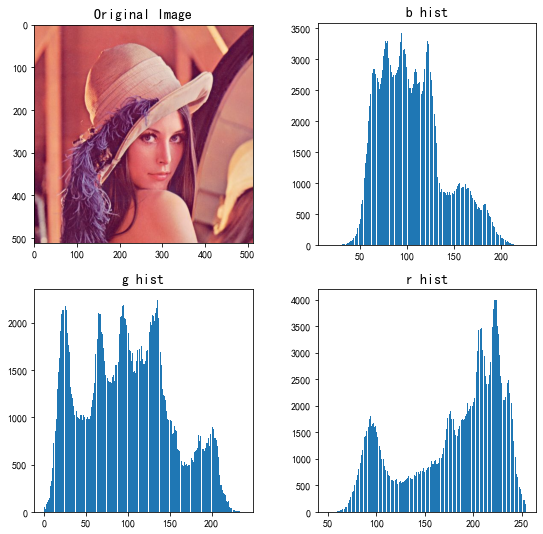

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 

img = cv2.imread('./images/lena.jpg') 
b,g,r = cv2.split(img)   

titles = ['Original Image', 'b hist','g hist','r hist']
images = [img, b, g,r]

for i in range(4):
    plt.subplot(2, 2, i + 1)
    if i==0:
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    else:
        plt.hist(images[i].ravel(),bins=256)
    plt.title(titles[i])
    # plt.xticks([]), plt.yticks([])

plt.subplots_adjust(wspace =0.3, hspace =0.2)#调整子图间距
plt.show()

### 2.2 计算直方图calcHist 


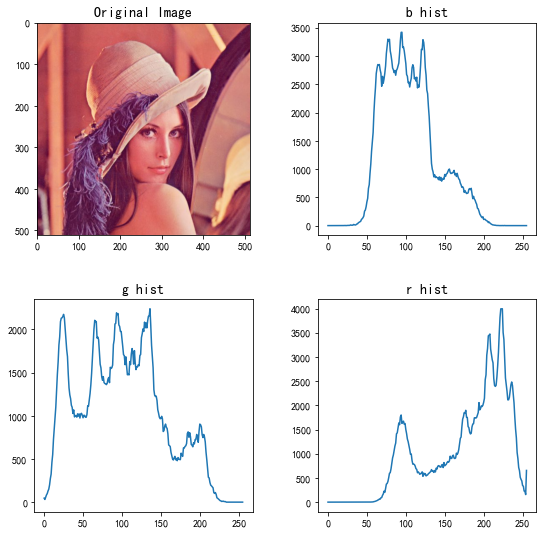

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 

img = cv2.imread('./images/lena.jpg') 
b,g,r = cv2.split(img)    

histSize = 256
histRange = (0, histSize) #统计的范围和histSize保持一致时可覆盖所有取值
b_hist = cv2.calcHist([b], [0], None, [histSize], histRange) 
g_hist = cv2.calcHist([g], [0], None, [histSize], histRange) 
r_hist = cv2.calcHist([r], [0], None, [histSize], histRange) 


titles = ['Original Image', 'b hist','g hist','r hist']
images = [img, b_hist, g_hist,r_hist]

for i in range(4):
    plt.subplot(2, 2, i + 1)
    if i==0:
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    else:
        plt.plot(images[i])
    plt.title(titles[i])
    # plt.xticks([]), plt.yticks([])

plt.subplots_adjust(wspace =0.3, hspace =0.3)#调整子图间距
plt.show()

我们使用cv.calcHist()来查找完整图像的直方图。 如果要查找图像某些区域的直方图，该怎么办？ 只需在要查找直方图的区域上创建一个白色的蒙版图像，其余为黑色，然后将其作为蒙板传递。

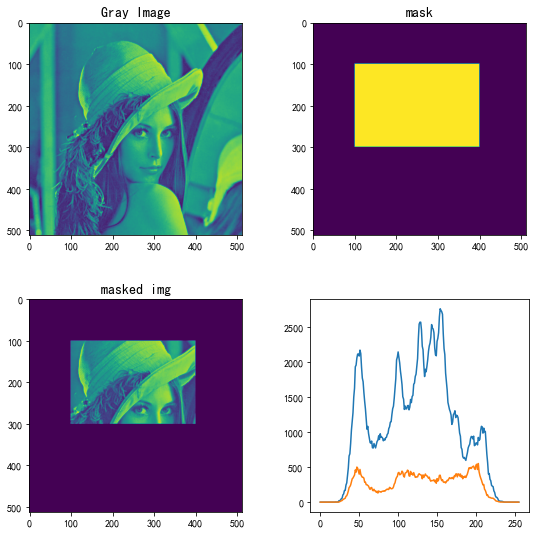

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 

img = cv2.imread('./images/lena.jpg',0)
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

titles = ['Gray Image', 'mask','masked img']
images = [img, mask, masked_img]

for i in range(4):
    plt.subplot(2, 2, i + 1)
    if i<3:
        plt.imshow(images[i])
        plt.title(titles[i])
    else:
        plt.plot(hist_full), plt.plot(hist_mask)
    # plt.xticks([]), plt.yticks([])

plt.subplots_adjust(wspace =0.3, hspace =0.3)#调整子图间距
plt.show()

在直方图中，蓝线显示完整图像的直方图，而绿线显示屏蔽区域的直方图。 

### 2.3 直方图均衡equalizeHist 
equalizeHist()可以实现图像的直方图均衡，它是一种全局直方图均衡，考量的对象是整幅图像。

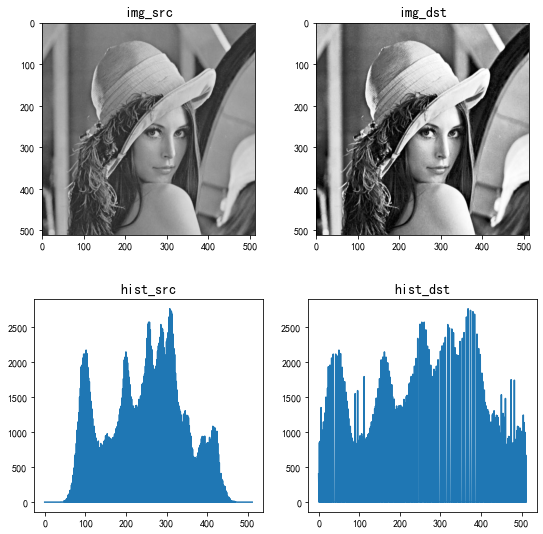

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 

img_src = cv2.imread('./images/lena.jpg',0) 
img_dst = cv2.equalizeHist(img_src) 

histSize = 512
histRange = (0, 256)  
hist_src = cv2.calcHist([img_src], [0], None, [histSize], histRange) 
hist_dst = cv2.calcHist([img_dst], [0], None, [histSize], histRange)  


titles = ['img_src', 'img_dst','hist_src','hist_dst']
images = [img_src, img_dst, hist_src,hist_dst]

for i in range(4):
    plt.subplot(2, 2, i + 1)
    if i<2:
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    else:
        plt.plot(images[i])
    plt.title(titles[i])
    # plt.xticks([]), plt.yticks([])

plt.subplots_adjust(wspace =0.2, hspace =0.3)#调整子图间距
plt.show()

从运行结果看，原来整体较暗的图像，经过直方图均衡后，整体要亮一些。

这点也和直方图显示的效果是一样的，原图的直方图整体要偏左，而经过直方图均衡后的直方图在x轴上分布更均匀。

### 2.4 自适应直方图均衡createCLAHE 

equalizeHist()方法是一种全局直方图均衡方法，在某些场合可能会导致原本对比度高的区域反而变得更低，像下面这个例子中原图上半部分的树叶对比度高，但是下半部分对比度低，如果使用equalizeHist()方法得到的图片如下图右下部分所示：

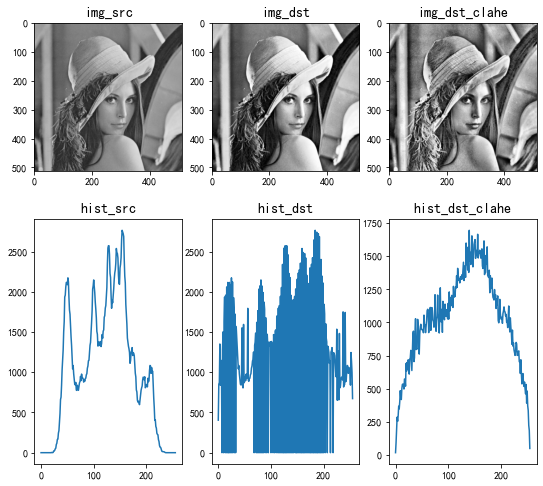

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 

img_src = cv2.imread('./images/lena.jpg',0) 
#普通直方图均衡
img_dst = cv2.equalizeHist(img_src)
#自适应直方图均衡 
clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(8,8))
img_dst_clahe = clahe.apply(img_src)

histSize = 256
histRange = (0, 256) 
hist_src = cv2.calcHist([img_src], [0], None, [histSize], histRange) 
hist_dst = cv2.calcHist([img_dst], [0], None, [histSize], histRange)  
hist_dst_clahe = cv2.calcHist([img_dst_clahe], [0], None, [histSize], histRange) 


titles = ['img_src', 'img_dst','img_dst_clahe','hist_src','hist_dst','hist_dst_clahe']
images = [img_src, img_dst,img_dst_clahe,hist_src,hist_dst,hist_dst_clahe]

for i in range(6):
    plt.subplot(2, 3, i + 1)
    if i<3:
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    else:
        plt.plot(images[i])
    plt.title(titles[i])
    # plt.xticks([]), plt.yticks([])

plt.subplots_adjust(wspace =0.2, hspace =0)#调整子图间距
plt.show()